In [ ]:
import gymnasium as gym
from stable_baselines3 import A2C, PPO, SAC
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import EvalCallback
import matplotlib.pyplot as plt
from stable_baselines3.common.logger import configure
import pandas as pd
import numpy as np
import os

# Crear carpetas
os.makedirs("./models", exist_ok=True)
os.makedirs("./logs", exist_ok=True)

Using cuda device
Wrapping the env in a DummyVecEnv.
Logging to ./ppo_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 380      |
|    ep_rew_mean     | -107     |
| time/              |          |
|    fps             | 1378     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 584         |
|    ep_rew_mean          | -107        |
| time/                   |             |
|    fps                  | 1061        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009692287 |
|    clip_fraction        | 0.0701      |
|    clip_range           | 0.2         |
|    entropy_loss         

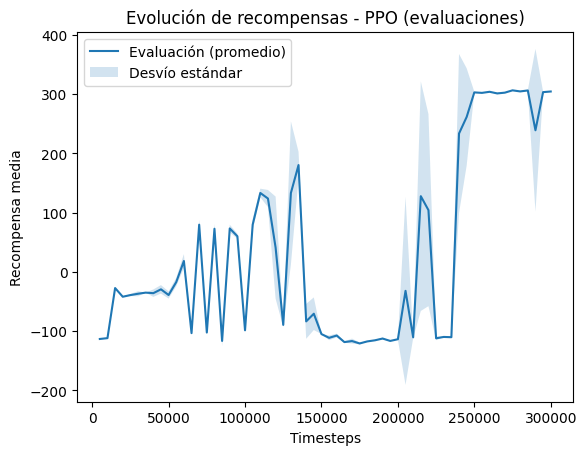

/home/agustin/Desktop/CEIA UBA/Aprendizaje por Refuerzo II/CEIA-AprendizajeRefuerzoII/.venv/lib/python3.12/site-packages/gymnasium/envs/box2d/bipedal_walker.py:619: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("BipedalWalker-v3", render_mode="rgb_array")
  gym.logger.warn(


In [ ]:
env = Monitor(gym.make("BipedalWalker-v3"))
eval_env = Monitor(gym.make("BipedalWalker-v3"))

eval_callback = EvalCallback(
    eval_env,
    best_model_save_path="./models/ppo/",
    log_path="./logs/ppo/",
    eval_freq=5000,
    deterministic=True,
)

best_model_path = os.path.join(model_dir, "best_model.zip")

model = PPO("MlpPolicy", env, verbose=1, tensorboard_log="./ppo_tensorboard/")
model.learn(total_timesteps=300_000, callback=eval_callback)
model.save("./models/ppo/best_model")

# === Graficar recompensas ===
eval_file_npz = "./logs/ppo/evaluations.npz"

if os.path.exists(eval_file_npz):
    data = np.load(eval_file_npz)
    timesteps = data["timesteps"]
    results = data["results"]

    plt.plot(timesteps, results.mean(axis=1), label="Evaluación (promedio)")
    plt.fill_between(
        timesteps,
        results.mean(axis=1) - results.std(axis=1),
        results.mean(axis=1) + results.std(axis=1),
        alpha=0.2,
        label="Desvío estándar",
    )
    plt.xlabel("Timesteps")
    plt.ylabel("Recompensa media")
    plt.title("Evolución de recompensas - PPO (evaluaciones)")
    plt.legend()
    plt.show()

else:
    print("No se encontró evaluations.npz — el callback puede no haber guardado evaluaciones.")


# === Cargar y evaluar ===
model = PPO.load("./models/ppo/best_model")
obs, _ = env.reset()
for step in range(1500):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    env.render()
    if done or truncated:
        obs, _ = env.reset()
env.close()




Using cuda device
Wrapping the env in a DummyVecEnv.
Logging to ./a2c_tensorboard/A2C_1
------------------------------------
| time/                 |          |
|    fps                | 833      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -5.61    |
|    explained_variance | 0.334    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -1.81    |
|    std                | 0.984    |
|    value_loss         | 0.291    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 166      |
|    ep_rew_mean        | -118     |
| time/                 |          |
|    fps                | 840      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                

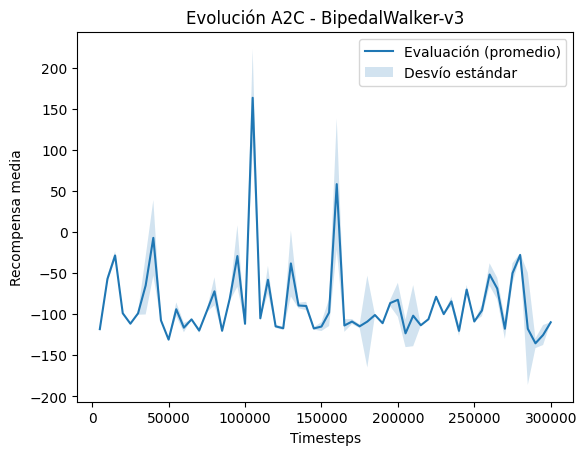

In [15]:
env = Monitor(gym.make("BipedalWalker-v3"))
eval_env = Monitor(gym.make("BipedalWalker-v3"))

eval_callback = EvalCallback(
    eval_env,
    best_model_save_path="./models/a2c/",
    log_path="./logs/a2c/",
    eval_freq=5000,
    deterministic=True,
)

model = A2C("MlpPolicy", env, verbose=1, tensorboard_log="./a2c_tensorboard/")
model.learn(total_timesteps=300_000, callback=eval_callback)
model.save("./models/a2c/best_model")

# === Graficar recompensas ===
eval_file_npz = "./logs/a2c/evaluations.npz"

if os.path.exists(eval_file_npz):
    data = np.load(eval_file_npz)
    timesteps = data["timesteps"]
    results = data["results"]

    # Promedio y desviación de recompensas
    mean_rewards = results.mean(axis=1)
    std_rewards = results.std(axis=1)

    plt.plot(timesteps, mean_rewards, label="Evaluación (promedio)")
    plt.fill_between(
        timesteps,
        mean_rewards - std_rewards,
        mean_rewards + std_rewards,
        alpha=0.2,
        label="Desvío estándar",
    )
    plt.xlabel("Timesteps")
    plt.ylabel("Recompensa media")
    plt.title("Evolución A2C - BipedalWalker-v3")
    plt.legend()
    plt.show()

else:
    print("No se encontró evaluations.npz — puede que el callback no haya guardado evaluaciones.")
    
# === Cargar y evaluar ===
model = A2C.load("./models/a2c/best_model")
obs, _ = env.reset()
for step in range(1500):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    env.render()
    if done or truncated:
        obs, _ = env.reset()
env.close()


Using cuda device
Wrapping the env in a DummyVecEnv.
Logging to ./sac_tensorboard/SAC_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 90.5     |
|    ep_rew_mean     | -110     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 221      |
|    time_elapsed    | 1        |
|    total_timesteps | 362      |
| train/             |          |
|    actor_loss      | -5.97    |
|    critic_loss     | 39.8     |
|    ent_coef        | 0.925    |
|    ent_coef_loss   | -0.519   |
|    learning_rate   | 0.0003   |
|    n_updates       | 261      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 269      |
|    ep_rew_mean     | -106     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 173      |
|    time_elapsed    | 12       |
|    total_timesteps | 2152     |
| train/             |      

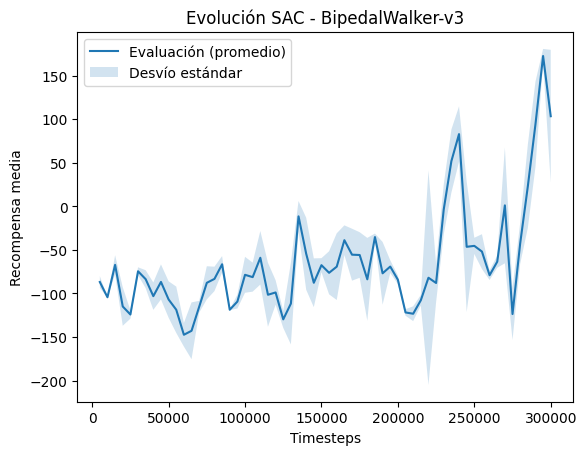

In [16]:
env = Monitor(gym.make("BipedalWalker-v3"))
eval_env = Monitor(gym.make("BipedalWalker-v3"))

eval_callback = EvalCallback(
    eval_env,
    best_model_save_path="./models/sac/",
    log_path="./logs/sac/",
    eval_freq=5000,
    deterministic=True,
)

model = SAC("MlpPolicy", env, verbose=1, tensorboard_log="./sac_tensorboard/")
model.learn(total_timesteps=300_000, callback=eval_callback)
model.save("./models/sac/best_model")

# === Graficar recompensas ===
eval_file_npz = "./logs/sac/evaluations.npz"

if os.path.exists(eval_file_npz):
    data = np.load(eval_file_npz)
    timesteps = data["timesteps"]
    results = data["results"]

    # Calcular promedio y desviación de recompensas
    mean_rewards = results.mean(axis=1)
    std_rewards = results.std(axis=1)

    plt.plot(timesteps, mean_rewards, label="Evaluación (promedio)")
    plt.fill_between(
        timesteps,
        mean_rewards - std_rewards,
        mean_rewards + std_rewards,
        alpha=0.2,
        label="Desvío estándar",
    )
    plt.xlabel("Timesteps")
    plt.ylabel("Recompensa media")
    plt.title("Evolución SAC - BipedalWalker-v3")
    plt.legend()
    plt.show()

else:
    print("No se encontró evaluations.npz — puede que el callback no haya guardado evaluaciones.")

# === Cargar y evaluar ===
model = SAC.load("./models/sac/best_model")
obs, _ = env.reset()
for step in range(1500):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    env.render()
    if done or truncated:
        obs, _ = env.reset()
env.close()


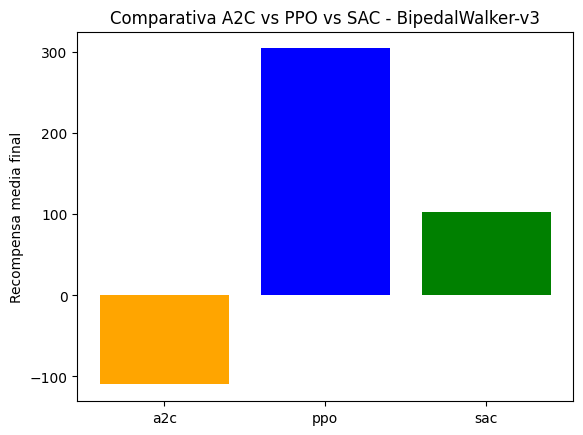

In [18]:
def get_mean_reward(alg_name):
    eval_file = f"./logs/{alg_name}/evaluations.npz"
    if os.path.exists(eval_file):
        data = np.load(eval_file)
        results = data["results"]  # matriz [n_evals, n_episodios]
        return results.mean(axis=1)[-1]  # promedio del último bloque de evaluaciones
    else:
        print(f"⚠️ No se encontró evaluations.npz para {alg_name}")
        return np.nan

# === Comparar los tres algoritmos ===
algos = ["a2c", "ppo", "sac"]
means = [get_mean_reward(a) for a in algos]

plt.bar(algos, means, color=["orange", "blue", "green"])
plt.ylabel("Recompensa media final")
plt.title("Comparativa A2C vs PPO vs SAC - BipedalWalker-v3")
plt.show()
